In [2]:
import pandas as pd
import glob
import os

# Directory where cleaned CSVs are stored
data_dir = "C:/Users/Amenzz/Desktop/kifiya/solar-challenge-week1/data/cleaned"
pattern = os.path.join(data_dir, "*_clean.csv")

# Dictionary to store DataFrames, keyed by country name (from filename)
country_data = {}

for filepath in glob.glob(pattern):
    # Extract country name from filename, e.g., 'benin' from 'benin_clean.csv'
    filename = os.path.basename(filepath)
    country = filename.replace('_clean.csv', '')
    
    # Load CSV into a DataFrame
    df = pd.read_csv(filepath)
    country_data[country] = df

# ✅ Example: Access Benin data
benin_df = country_data.get('benin')
print(benin_df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


C:\Users\Amenzz\AppData\Local\Temp\ipykernel_17652\3571709832.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, ax=axes[i], palette='Set2')
C:\Users\Amenzz\AppData\Local\Temp\ipykernel_17652\3571709832.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, ax=axes[i], palette='Set2')
C:\Users\Amenzz\AppData\Local\Temp\ipykernel_17652\3571709832.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, ax=axes[i], palette='Set2')
C:\Users\A

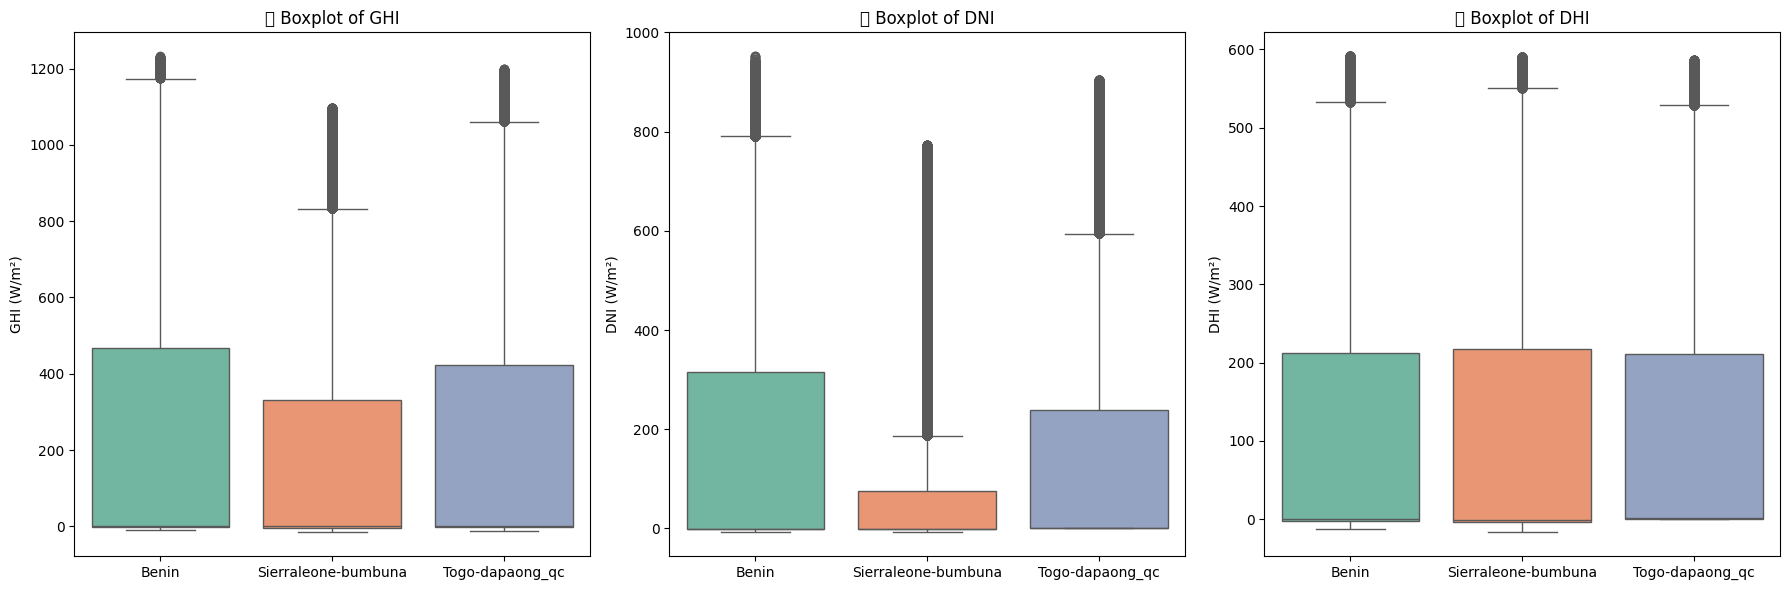


📊 Summary Table (Mean, Median, Std):
                        GHI                    DNI                    DHI  \
                       mean median     std    mean median     std    mean   
Country                                                                     
Benin                236.23    0.7  328.29  166.90   -0.1  262.08  111.66   
Sierraleone-bumbuna  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   
Togo-dapaong_qc      223.86    0.5  317.31  147.98    0.0  247.68  112.78   

                                    
                    median     std  
Country                             
Benin                  0.5  153.10  
Sierraleone-bumbuna   -0.6  153.69  
Togo-dapaong_qc        1.5  151.57  


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

# Step 1: Load all cleaned country CSVs
data_dir = "C:/Users/Amenzz/Desktop/kifiya/solar-challenge-week1/data/cleaned"
pattern = os.path.join(data_dir, "*_clean.csv")

country_data = {}

for filepath in glob.glob(pattern):
    filename = os.path.basename(filepath)
    country = filename.replace('_clean.csv', '')
    df = pd.read_csv(filepath)
    country_data[country] = df

# Step 2: Combine data and add 'Country' column
combined_data = []

for country, df in country_data.items():
    df['Country'] = country.capitalize()  # Capitalize for consistency
    subset = df[['Country', 'GHI', 'DNI', 'DHI']].dropna()
    combined_data.append(subset)

df_all = pd.concat(combined_data, ignore_index=True)

# Step 3: Boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.boxplot(data=df_all, x='Country', y=metric, ax=axes[i], palette='Set2')
    axes[i].set_title(f"📦 Boxplot of {metric}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(f"{metric} (W/m²)")

plt.tight_layout()
plt.show()

# Step 4: Summary Table - Mean, Median, Standard Deviation
summary_table = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
print("\n📊 Summary Table (Mean, Median, Std):")
print(summary_table)


In [4]:
import scipy.stats as stats

# Group GHI values by country
groups = [group['GHI'].dropna().values for name, group in df_all.groupby('Country')]

# Country names (for display)
country_names = df_all['Country'].unique()

# 1. One-way ANOVA
anova_stat, anova_p = stats.f_oneway(*groups)
print(f"\n🔬 One-way ANOVA: F-statistic = {anova_stat:.3f}, p-value = {anova_p:.4f}")

# 2. Kruskal–Wallis H-test
kruskal_stat, kruskal_p = stats.kruskal(*groups)
print(f"🔬 Kruskal–Wallis Test: H-statistic = {kruskal_stat:.3f}, p-value = {kruskal_p:.4f}")

# Interpretation
alpha = 0.05
if anova_p < alpha:
    print("✅ ANOVA: Statistically significant differences between countries' GHI values (p < 0.05).")
else:
    print("ℹ️ ANOVA: No statistically significant difference (p ≥ 0.05).")

if kruskal_p < alpha:
    print("✅ Kruskal–Wallis: Statistically significant differences between countries' GHI values (p < 0.05).")
else:
    print("ℹ️ Kruskal–Wallis: No statistically significant difference (p ≥ 0.05).")



🔬 One-way ANOVA: F-statistic = 3833.184, p-value = 0.0000
🔬 Kruskal–Wallis Test: H-statistic = 6548.534, p-value = 0.0000
✅ ANOVA: Statistically significant differences between countries' GHI values (p < 0.05).
✅ Kruskal–Wallis: Statistically significant differences between countries' GHI values (p < 0.05).


In [ ]:
### 📌 Key Observations

-  **Benin** shows the **highest mean GHI (236.23 W/m²)**, making it the most promising location for solar energy, but also has the **highest variability** (std = 328.29).
-  **Togo-dapaong_qc** has a **higher median DHI (1.5)** compared to the others, suggesting relatively consistent diffuse solar radiation.
-  **Sierraleone-bumbuna** records the **lowest average and median values** across all metrics (GHI, DNI, DHI), indicating limited and less consistent solar irradiance overall.

C:\Users\Amenzz\AppData\Local\Temp\ipykernel_17652\3980194196.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_summary, x='Average_GHI', y='Country', palette='YlOrBr')
C:\Users\Amenzz\AppData\Local\Temp\ipykernel_17652\3980194196.py:23: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Amenzz\Desktop\kifiya\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128262 (\N{HIGH BRIGHTNESS SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


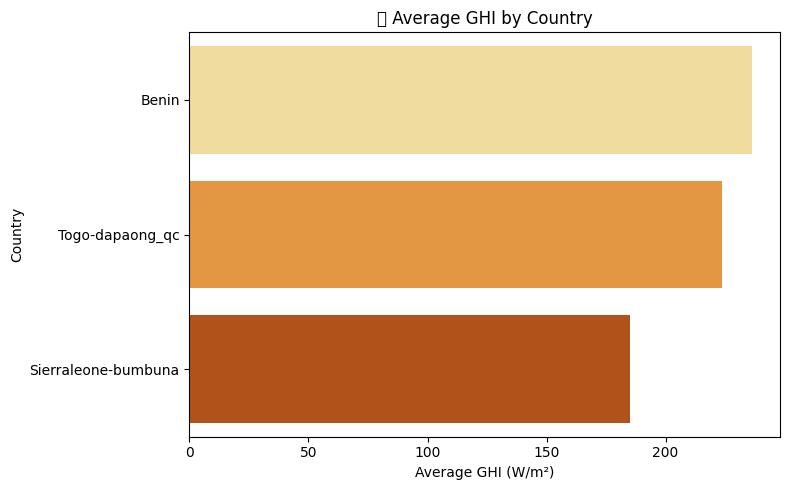

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Manually create the summary data
data = {
    'Country': ['Benin', 'Sierraleone-bumbuna', 'Togo-dapaong_qc'],
    'Average_GHI': [236.23, 185.00, 223.86]
}

df_summary = pd.DataFrame(data)

# Sort by Average_GHI
df_summary = df_summary.sort_values(by='Average_GHI', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_summary, x='Average_GHI', y='Country', palette='YlOrBr')

plt.title('🔆 Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
